# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn import preprocessing

# Dataset Read

In [2]:
file_path = "winequality-red.csv"

In [3]:
df = pd.read_csv(file_path, sep=";")

# Dataset Print

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Summary statistics of the numeric columns

In [5]:
print(df.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

# Checking the data types of the columns

In [6]:
print(df.dtypes)

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


# Missing values checking

In [7]:
print(df.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [8]:
print(df.nunique())

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64


# Exploratory Data Analysis

## Histogram Plot 

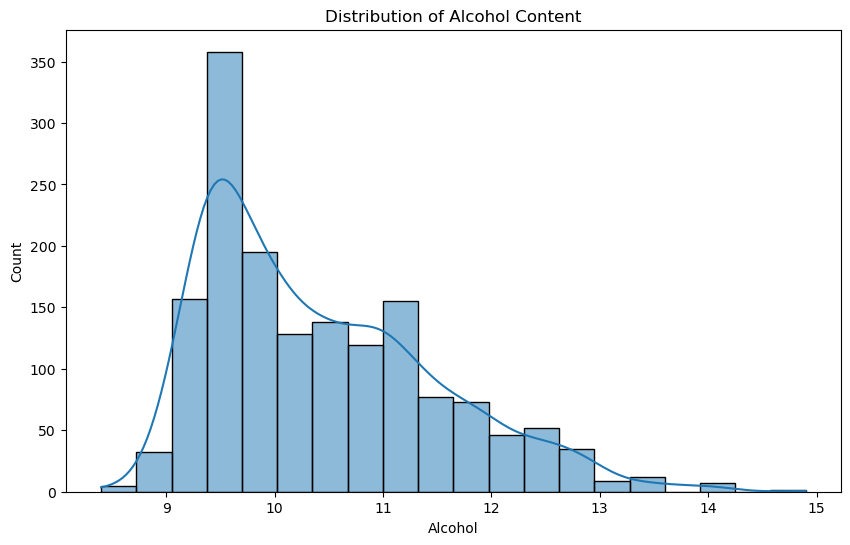

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(df["alcohol"], bins=20, kde=True)
plt.title("Distribution of Alcohol Content")
plt.xlabel("Alcohol")
plt.ylabel("Count")
plt.show()


##  Correlation between numeric columns

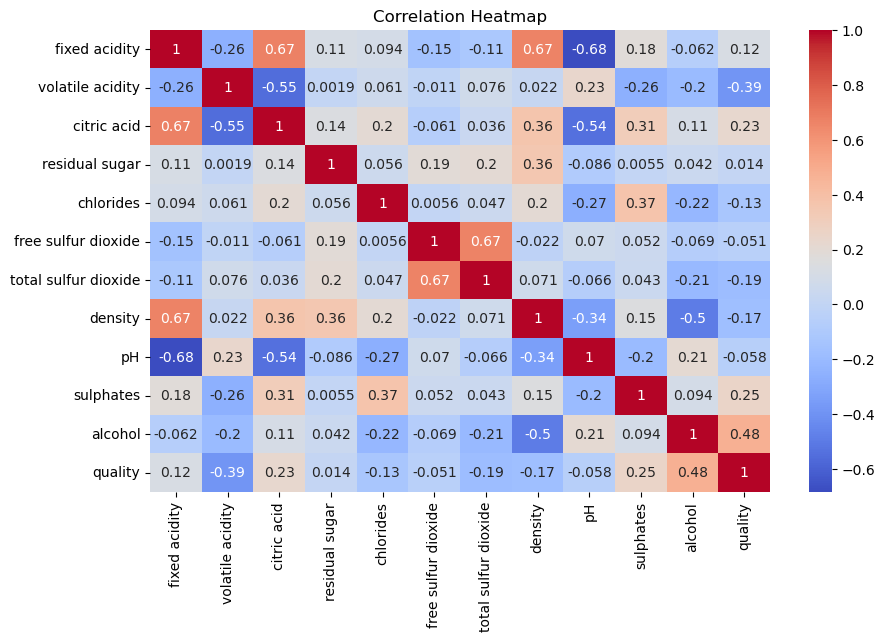

In [10]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

## Scatter Plot

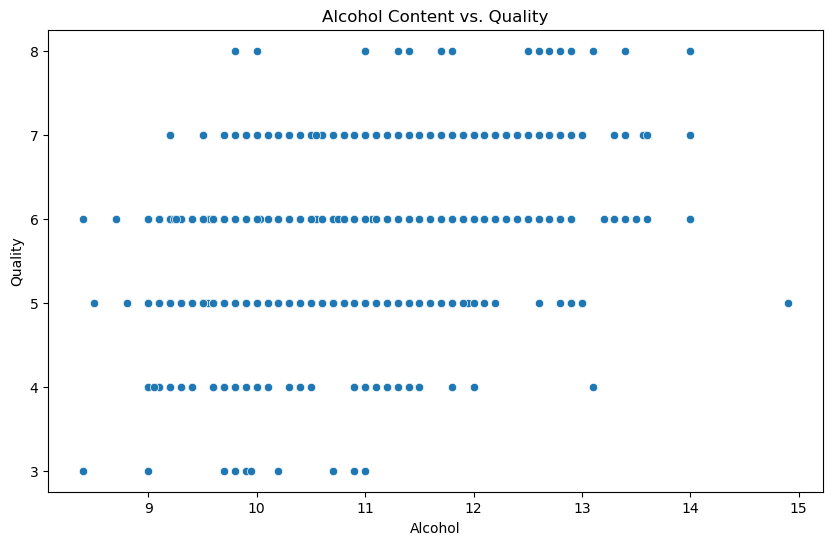

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="alcohol", y="quality")
plt.title("Alcohol Content vs. Quality")
plt.xlabel("Alcohol")
plt.ylabel("Quality")
plt.show()

## Box Plot

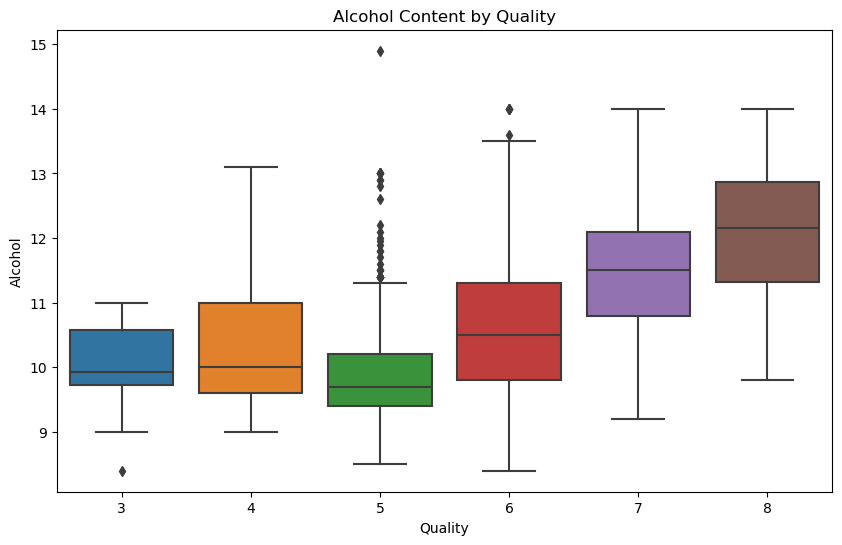

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="quality", y="alcohol")
plt.title("Alcohol Content by Quality")
plt.xlabel("Quality")
plt.ylabel("Alcohol")
plt.show()

# Pre-processing and Feature Selection

In [13]:
oversample = SMOTE()
features, labels=  oversample.fit_resample(df.drop(["quality"],axis=1),df["quality"])

In [14]:
scaler = preprocessing.MinMaxScaler()
names = features.columns
d = scaler.fit_transform(features)

scaled_df = pd.DataFrame(d, columns=names)
scaled_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846


# Dataset Splitting in train and test

In [15]:
X_train, X_test, y_train, y_test=train_test_split(scaled_df,labels,test_size=0.33,random_state=42)

# Model Implementation

In [16]:
models = [RandomForestClassifier(), KNeighborsClassifier(), SVC() , LogisticRegression()]
scores = dict()

## Random Forest Classifier 

### Model Fitting

In [17]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

### Accuracy of the model

In [18]:
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Random Forest Classifier Accuracy: {rf_accuracy}")

Random Forest Classifier Accuracy: 0.843587842846553


### Classification Report

In [19]:
print("Random Forest Classifier:")
print(classification_report(y_test, rf_predictions))

Random Forest Classifier:
              precision    recall  f1-score   support

           3       0.96      1.00      0.98       216
           4       0.85      0.92      0.88       220
           5       0.73      0.76      0.74       242
           6       0.72      0.51      0.60       240
           7       0.82      0.93      0.87       214
           8       0.97      0.99      0.98       217

    accuracy                           0.84      1349
   macro avg       0.84      0.85      0.84      1349
weighted avg       0.84      0.84      0.84      1349



#### Confusion Matrix

In [20]:
rf_cm = confusion_matrix(y_test, rf_predictions)
print("Confusion Matrix:")
print(rf_cm)

Confusion Matrix:
[[216   0   0   0   0   0]
 [  2 202  10   4   2   0]
 [  4  17 184  33   4   0]
 [  3  16  58 123  36   4]
 [  0   2   1  10 198   3]
 [  0   0   0   0   2 215]]


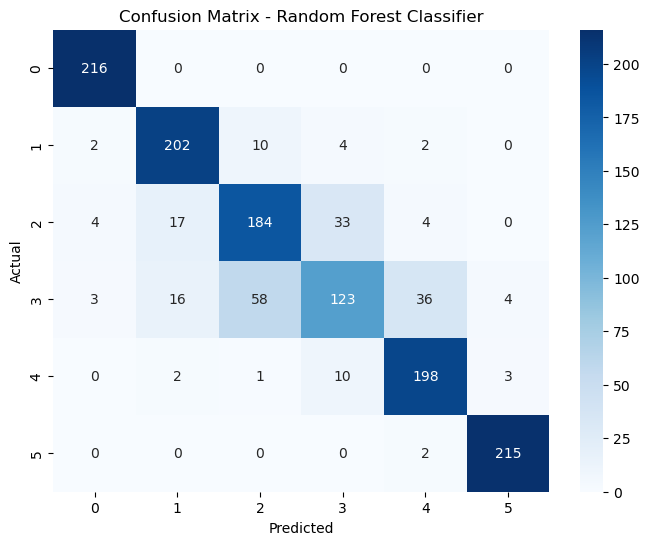

In [21]:
plt.figure(figsize=(8, 6))
sns.heatmap(rf_cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix - Random Forest Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### KNN Classifier 

#### Model Fitting

In [22]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


### Accuracy

In [23]:
knn_accuracy = accuracy_score(y_test, knn_predictions)
print(f"K-Nearest Neighbors Classifier Accuracy: {knn_accuracy}")

K-Nearest Neighbors Classifier Accuracy: 0.7472201630837657


### Classification Model

In [24]:
print("K-Nearest Neighbors Classifier:")
print(classification_report(y_test, knn_predictions))

K-Nearest Neighbors Classifier:
              precision    recall  f1-score   support

           3       0.90      1.00      0.95       216
           4       0.73      0.93      0.82       220
           5       0.64      0.53      0.58       242
           6       0.53      0.32      0.40       240
           7       0.73      0.81      0.77       214
           8       0.85      0.97      0.91       217

    accuracy                           0.75      1349
   macro avg       0.73      0.76      0.74      1349
weighted avg       0.72      0.75      0.73      1349



### Confusion Matrix

In [25]:
knn_cm = confusion_matrix(y_test, knn_predictions)
print("Confusion Matrix:")
print(knn_cm)

Confusion Matrix:
[[216   0   0   0   0   0]
 [  6 204   6   4   0   0]
 [ 11  45 128  47  10   1]
 [  8  31  63  76  47  15]
 [  0   0   4  16 173  21]
 [  0   0   0   0   6 211]]


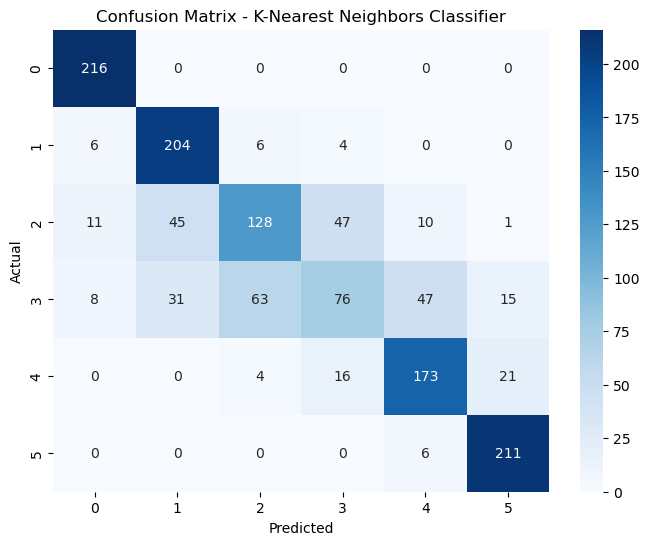

In [26]:
plt.figure(figsize=(8, 6))
sns.heatmap(knn_cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix - K-Nearest Neighbors Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## SVC Model

### Model Fitting

In [27]:
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)

### Accuracy 

In [28]:
svm_accuracy = accuracy_score(y_test, svm_predictions)
print(f"Support Vector Machine Classifier Accuracy: {svm_accuracy}")

Support Vector Machine Classifier Accuracy: 0.7027427724240178


### Classification Report

In [29]:
print(classification_report(y_test, svm_predictions))

              precision    recall  f1-score   support

           3       0.86      1.00      0.92       216
           4       0.68      0.73      0.70       220
           5       0.62      0.61      0.62       242
           6       0.55      0.35      0.43       240
           7       0.69      0.61      0.65       214
           8       0.75      0.96      0.85       217

    accuracy                           0.70      1349
   macro avg       0.69      0.71      0.69      1349
weighted avg       0.69      0.70      0.69      1349



### Confusion Matrix

In [30]:
svm_cm = confusion_matrix(y_test, svm_predictions)
print("Confusion Matrix:")
print(svm_cm)

Confusion Matrix:
[[216   0   0   0   0   0]
 [ 17 160  35   8   0   0]
 [ 13  37 148  37   6   1]
 [  6  32  54  84  45  19]
 [  0   8   2  25 131  48]
 [  0   0   0   0   8 209]]


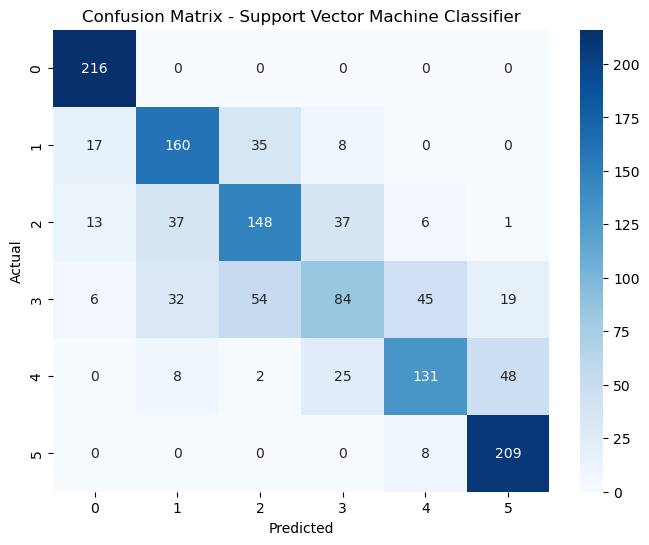

In [31]:
plt.figure(figsize=(8, 6))
sns.heatmap(svm_cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix - Support Vector Machine Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Decision Tree Classifier

### Model Fitting

In [32]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)

### Accuracy Score

In [33]:
dt_accuracy = accuracy_score(y_test, dt_predictions)
print(f"Decision Tree Classifier Accuracy: {dt_accuracy}")

Decision Tree Classifier Accuracy: 0.7694588584136397


### Classification Report

In [34]:
print("Decision Tree Classifier:")
print(classification_report(y_test, dt_predictions))

Decision Tree Classifier:
              precision    recall  f1-score   support

           3       0.89      0.99      0.93       216
           4       0.81      0.76      0.78       220
           5       0.68      0.67      0.67       242
           6       0.56      0.51      0.53       240
           7       0.76      0.79      0.77       214
           8       0.92      0.95      0.93       217

    accuracy                           0.77      1349
   macro avg       0.77      0.78      0.77      1349
weighted avg       0.76      0.77      0.77      1349



### Confusion Matrix

In [35]:
dt_cm = confusion_matrix(y_test, dt_predictions)
print("Confusion Matrix:")
print(dt_cm)

Confusion Matrix:
[[213   2   1   0   0   0]
 [  8 167  19  23   3   0]
 [  9  20 161  44   8   0]
 [ 10  16  51 122  35   6]
 [  0   1   4  28 168  13]
 [  0   0   0   2   8 207]]


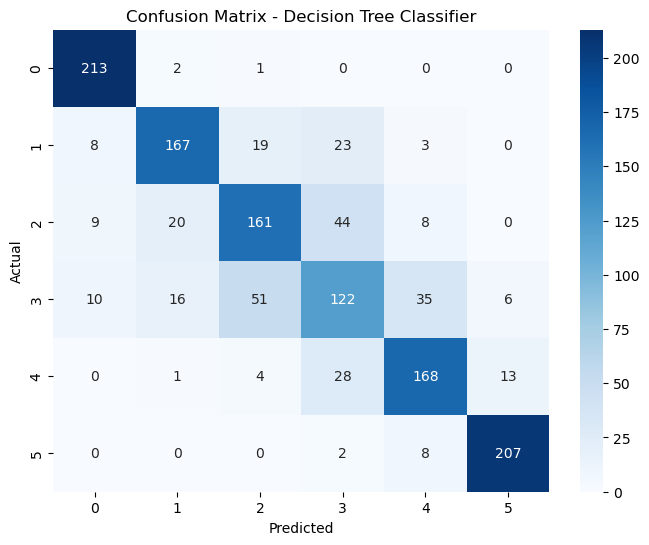

In [36]:
plt.figure(figsize=(8, 6))
sns.heatmap(dt_cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix - Decision Tree Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()